<div style="text-align: right"> Kevin Le </div>
<div style="text-align: right"> CSE 803 </div>
<div style="text-align: right"> Hw3 </div>



In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from common import *

**RANSAC [30 pts]**\
**1.1 Fitting a Line [10 pts]** \
In this section, each question depends on the previous one. By putative model, we mean the model that is fit
in the inner loop of RANSAC


Suppose we are fitting a line (e.g., y = mx + b). How many points do we need to sample in an
iteration to compute a putative model?

We need at least 2 points to compute the model since at minimum, 2 points makes a line.

In the previous setting, suppose the outlier ratio of the data set is 0.1. What is the probability
that a putative model fails to get a desired model?

Given $ r = 0.1$ such that it is 10% to get an outlier \
N = number of trials \
s = Number of points for the subset 
$$
Failure = (1 - (1 - r)^{s})^{N} = (1 - 0.9^{s})^{N}
$$
Since we state 2 is the minimum, $s = 2$ thus:
$$
Failure = (1 - 0.9^{2})^{N} = (1 - 0.81)^{N} = 0.19^{N}
$$
Therefore the probability to fail to get a desired model is 19% for a trial

In the previous settings, to exceed a probability level of 95% for success, how many trials
should we attempt to fit putative models?

Given that $Success = 1 - Failure = 1 - 0.19^{N}$ \
We need to have a probability level of >0.95 for a success. 
$$
0.95 < 1 - 0.19^{N} \\
-0.05 < -0.19^{N} \\
log_{-0.19}(-0.05) < N\\
\sim 1.8 < N
$$
Thus we need at least 2 trials to exceed the probability level of 95%

**1.2 Fitting Transformations [20 pts]** \
We’ll begin by reviewing fitting transformations from 2D points to 2D points. You will need to use these
results to solve the subsequent sections

Recall that a matrix $M\in \mathbb{R}^{2×2}$
is a linear transformation: $\mathbb{R}^{2} \rightarrow \mathbb{R}^{2}$. How many degrees of
freedom does $M$ have? How many samples are required to find $M$?

Since we have a 2x2 matrix, that means we have 4 elements that are changeable, thus there are 4 degrees of freedom in M. Each row in the M matrix is a sample, thus with a 2x2 matrix, we have 2 samples for M.

Suppose we have a dataset ${(x_{i}, y_{i})}^{N}_{i=1}$ and want to fit $y = Mx$. Formulate the fitting problem into the form of a least squares problem:
$$
argmin_{m}||Am − b||^{2}
$$
where m is some vector that has all the parameters of M. Write out the form of A.

Given:
$$
y = Mx \rightarrow \begin{pmatrix} y_{1} \\ y_{2}\end{pmatrix} = \begin{pmatrix} M_{11} & M_{12} \\ M_{21} & M_{22}\end{pmatrix}\begin{pmatrix} x_{1} \\ x_{2}\end{pmatrix} 
$$
Since ${(x_{i}, y_{i})}^{N}_{i=1}$:
$$
A^{2N \times 4}*m^{4 \times 1} = b^{2N \times 1}
$$ 
where m is the vertical collapse of M. 2N due to the 2 points for a sample. Thus:
$$
\begin{pmatrix} y^{1}_{1} \\ y^{1}_{2} \\ y^{2}_{1} \\ y^{2}_{2} \\ ... \\ y^{N}_{1} \\ y^{N}_{2}\end{pmatrix} =
\begin{pmatrix} x^{1}_{1} & x^{1}_{2} & 0 & 0 \\ 0 & 0 & x^{1}_{1} & x^{1}_{2} \\ ... & ... & ... & ... \\ x^{N}_{1} & x^{N}_{2} & 0 & 0 \\ 0 & 0 & x^{N}_{1} & x^{N}_{2}\end{pmatrix}
\begin{pmatrix} M_{11} \\ M_{12} \\ M_{21} \\ M_{22}\end{pmatrix}
$$
Therefore:
$$
A =  \begin{pmatrix} x^{1}_{1} & x^{1}_{2} & 0 & 0 \\ 0 & 0 & x^{1}_{1} & x^{1}_{2} \\ ... & ... & ... & ... \\ x^{N}_{1} & x^{N}_{2} & 0 & 0 \\ 0 & 0 & x^{N}_{1} & x^{N}_{2}\end{pmatrix}
$$

Use numpy.load() to load p1/transform.npy. Each row contains two points x and y,
represented in the form $[x^{T}_{i}, y^{T}_{i}]_{1×4}$. Then fit a transformation:
$$
y = Sx + t
$$
where $S \in \mathbb{R}^{2×2}, t \in \mathbb{R}^{2×1}$. Solve the problem by setting up an optimization of the form of
$argmin_{v}||Am − b||^{2}$. Report S and t.

Given:
$$
y = Sx + t \rightarrow \begin{pmatrix} y_{1} \\ y_{2}\end{pmatrix} = \begin{pmatrix} S_{11} & S_{12} \\ S_{21} & S_{22}\end{pmatrix}\begin{pmatrix} x_{1} \\ x_{2}\end{pmatrix} +\begin{pmatrix} t_{1} \\ t_{2}\end{pmatrix}
$$
Since m in ||Am-b|| is our unknown, collapse S and t into a vertical vector
$$
m = \begin{pmatrix} S_{11} \\ S_{12} \\ S_{21} \\ S_{22} \\ t_{1} \\ t_{2}\end{pmatrix}
$$
Thus:
$$
\begin{pmatrix} y^{1}_{1} \\ y^{1}_{2} \\ y^{2}_{1} \\ y^{2}_{2} \\ ... \\ y^{N}_{1} \\ y^{N}_{2}\end{pmatrix} =
\begin{pmatrix} x^{1}_{1} & x^{1}_{2} & 0 & 0 & 1 & 0\\ 0 & 0 & x^{1}_{1} & x^{1}_{2} & 0 & 1 \\ ... & ... & ... & ... & ... & ... \\ x^{N}_{1} & x^{N}_{2} & 0 & 0 & 1 & 0 \\ 0 & 0 & x^{N}_{1} & x^{N}_{2} & 0 & 1\end{pmatrix} \begin{pmatrix} S_{11} \\ S_{12} \\ S_{21} \\ S_{22} \\ t_{1} \\ t_{2}\end{pmatrix}
$$
Given: $m = (A^{T}A)^{-1}A^{T}b$

In [78]:
data_set = np.load("p1/transform.npy")
A = np.zeros((2* data_set.shape[0], 6))
b = np.zeros((2* data_set.shape[0], 1))
x = np.zeros((2* data_set.shape[0], 1))
for point in data_set:
    A = np.vstack((A, np.array([point[0], point[1], 0, 0, 1, 0])))
    A = np.vstack((A, np.array([0, 0, point[0], point[1], 0, 1])))

    b = np.vstack((b, point[2]))
    b = np.vstack((b, point[3]))

    x = np.vstack((x, point[0]))
    x = np.vstack((x, point[1]))

m = np.linalg.inv(A.T @ A) @ A.T @ b
s = m[0:4].reshape(2,2)
t = m[4:]
print(s)
print(t)

[[ 2.04098127 -1.01644528]
 [-3.0696843   0.94335775]]
[[-1.87154926]
 [-3.05145812]]


Thus:
$$
S = \begin{pmatrix}2.0498127 & -1.01644528 \\ -3.0696843 & 0.94335775\end{pmatrix} \\
t = \begin{pmatrix} -1.87154926 \\ -3.05145812\end{pmatrix}
$$

Plot the points x, y and $\hat{y} = Sx + t$ in one figure with different colors. Display the figure

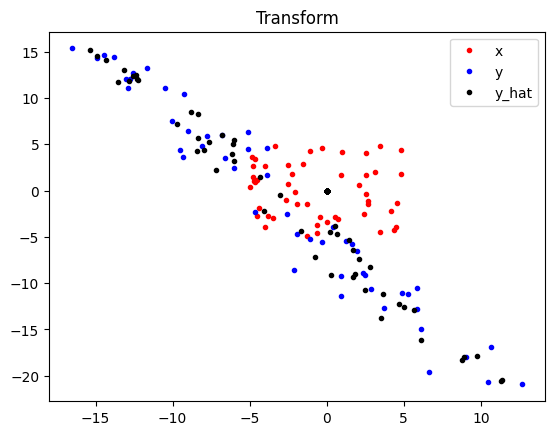

In [77]:
y_hat = A @ m
x_plot = x.reshape(-1, 2)
y_hat_plot = y_hat.reshape(-1, 2)
y_plot = b.reshape(-1, 2)

plt.plot(x_plot[:, 0], x_plot[:, 1], 'r.', y_plot[:, 0], y_plot[:, 1], 'b.', y_hat_plot[:, 0], y_hat_plot[:, 1], 'k.')
plt.title('Transform')
plt.legend(['x', 'y', 'y_hat'])
plt.show()

Explain how you transform the points in words based on S and t. Is the fitting result good?

S and t takes the values from $X \in [-5,5]$ and maps it to $\approx [-20,15]$ "y_hat" is a good fit since there is a close corrolation to y shown in the plot 

We have 8 cases of homography transformation of letter M. In each case, there are two sets of
2D points X and Y, which are represented in the same format as 1.2.3 (a N×4 array with each row in
the form $[x^{T}_{i}, y^{T}_{i}]_{1×4}$, we have loaded the data for you). For each case, fit a homography
$$
\begin{bmatrix} y \\ 1\end{bmatrix} \equiv H \begin{bmatrix} x \\ 1\end{bmatrix} 
$$

where $H \in \mathbb{R}^{3×3}$. Solve the problem by dealing with the optimization of the form of $argmin_{h}||Ah||^{2}$
with $||h|| = 1$ where h has all the parameters of H. Report matrix H of each case.

Given:
$$
y = Hx \rightarrow 
\begin{bmatrix}
y_{1} \\
y_{2} \\
1
\end{bmatrix} =
\begin{bmatrix}
H_{11} & H_{12} & H_{13} \\
H_{21} & H_{22} & H_{23} \\
H_{31} & H_{32} & H_{33} \\
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
y_{2} \\
1
\end{bmatrix}
$$
Note from Szeliski: 
$$
x' = \frac{h_{11}x + h_{12}y + h_{13}}{h_{31} + h_{32} + h_{33}}
$$
$$
y' = \frac{h_{21}x + h_{22}y + h_{23}}{h_{31} + h_{32} + h_{33}} 
$$
Collapse and create a vertical vector for H:
$$
h = \begin{bmatrix}
H_{11} \\ H_{12} \\ H_{13} \\
H_{21} \\ H_{22} \\ H_{23} \\
H_{31} \\ H_{32} \\ H_{33} \\
\end{bmatrix}
$$

Thus, with $N \times 4$ arrays,
$$
A = 
\begin{bmatrix}
0 & 0 & 0 & -X^{1}_{1} & -X^{1}_{2} & -X^{1}_{3} & (Y^{1}_{2} * X^{1}_{1}) & (Y^{1}_{2} * X^{1}_{2}) & (Y^{1}_{2} * X^{1}_{3}) \\
X^{1}_{1} & X^{1}_{2} & X^{1}_{3} & 0 & 0 & 0 & (-Y^{1}_{1} * X^{1}_{1}) & (-Y^{1}_{1} * X^{1}_{2}) & (-Y^{1}_{1} * X^{1}_{3}) \\
... & ... & ... & ... & ... & ... & ... & ... & ... \\
0 & 0 & 0 & -X^{N}_{1} & -X^{N}_{2} & -X^{N}_{3} & (Y^{N}_{2} * X^{N}_{1}) & (Y^{N}_{2} * X^{N}_{2}) & (Y^{N}_{2} * X^{N}_{3}) \\
X^{N}_{1} & X^{N}_{2} & X^{N}_{3} & 0 & 0 & 0 & (-Y^{N}_{1} * X^{N}_{1}) & (-Y^{N}_{1} * X^{N}_{2}) & (-Y^{N}_{1} * X^{N}_{3}) \\
\end{bmatrix}_{2N\times 9}
$$

Getting eigen vector for $A^{T}A$ with the smallest eigen value gets H

In [93]:
def homography_transform(X, H):
    # Perform homography transformation on a set of points X
    # using homography matrix H
    # Input - a set of 2D points in an array with size (N,2)
    #         a 3*3 homography matrix 
    # Output - a set of 2D points in an array with size (N,2)
    X = np.hstack((X, np.ones((X.shape[0],1))))
    Y = X @ H.T
    Y /= Y[:,2:3]
    return Y[:,:2]


def fit_homography(XY):
    # Given two set of points X, Y in one array,
    # fit a homography matrix from X to Y
    # Input - an array with size(N,4), each row contains two
    #         points in the form[x^T_i,y^T_i]1×4
    # Output - a 3*3 homography matrix
    X = XY[:,0:2]
    Y = XY[:,2:4]
    rows = XY.shape[0]
    o = np.ones((rows,1))
    X = np.hstack((X, o)) 
    A = np.zeros((rows*2, 9))
    for i in range(rows):
        A = np.vstack((A, np.array([0,0,0, -X[i][0], -X[i][1], -X[i][2], Y[i][1] * X[i][0], Y[i][1] * X[i][1], Y[i][1] * X[i][2]])))
        A = np.vstack((A, np.array([X[i][0], X[i][1], X[i][2], 0,0,0, -Y[i][0] * X[i][0], -Y[i][0] * X[i][1], -Y[i][0] * X[i][2]])))
    val, vec = np.linalg.eig(A.T @ A)
    H = vec[:, np.argmin(val)].reshape((3, 3))
    return H


$$
H0 =
\begin{pmatrix}
-5.84619486e^{-01} & -9.38188545e^{-04} &  7.85709945e^{-02} \\
-1.48861804e^{-03} & -3.61934740e^{-01} &  4.27826653e^{-01} \\
-2.62615121e^{-05} & -2.09196954e^{-05} & -5.81387269e^{-01} \\
\end{pmatrix}
$$

$$
H1 =
\begin{pmatrix}
3.68911272e^{-01} & 8.92258702e^{-04} & -3.93043451e^{-01} \\
2.75059829e^{-05} & 5.96020476e^{-01} & -2.41643576e^{-02} \\
2.17658960e^{-07} & 1.34347784e^{-05} &  5.94639553e^{-01} \\
\end{pmatrix}
$$

$$
H2 =
\begin{pmatrix}
-2.53193239e^{-01} & -3.99057800e^{-03} &  5.69038181e^{-01} \\
-5.45228988e^{-03} & -2.53238879e^{-01} &  6.28011972e^{-01} \\
-1.21872179e^{-04} & -1.08513265e^{-04} & -3.91808736e^{-01} \\
\end{pmatrix}
$$

$$
H3 =
\begin{pmatrix}
3.09846350e^{-12} & 5.77350269e^{-01} & -2.27213490e^{-10} \\
5.77350269e^{-01} & 9.18668681e^{-13} & -7.49060732e^{-11} \\
3.81114701e^{-14} & 2.27553847e^{-14} &  5.77350269e^{-01} \\
\end{pmatrix}
$$

$$
H4 =
\begin{pmatrix}
-7.91063985e^{-03} &  2.28491079e^{-13} & 6.01208628e^{-01} \\
-5.35800683e^{-14} & -7.91063985e^{-03} & 7.98974625e^{-01} \\
 2.89392053e^{-15} & -1.06881468e^{-15} & 7.91063985e^{-03} \\
\end{pmatrix}
$$

$$
H5 =
\begin{pmatrix}
-1.38048111e^{-01} & -2.19005570e^{-01} &  6.17163607e^{-01} \\
-2.20297434e^{-01} & -1.36451811e^{-01} &  6.05518007e^{-01} \\
-7.60197606e^{-05} & -4.81267787e^{-05} & -3.43927668e^{-01} \\
\end{pmatrix}
$$
$$
H6 =
\begin{pmatrix}
 1.34941272e^{-01} &  7.96016480e^{-03} & -1.11241055e^{-02} \\
-1.37954817e^{-02} &  1.51370758e^{-01} &  9.63220032e^{-01} \\
-5.34941898e^{-05} & -1.11646326e^{-05} &  1.75235524e^{-01} \\
\end{pmatrix}
$$

$$
H7 =
\begin{pmatrix}
-1.44485744e^{-01} &  8.35368093e^{-03} & -7.39389853e^{-01} \\
 8.19996491e^{-03} & -1.69535496e^{-01} & -6.11590373e^{-01} \\
 7.82502801e^{-05} & -1.85804532e^{-05} & -1.71768495e^{-01} \\
\end{pmatrix}
$$

Visualize the original points, the target points and the points after homography transformation
in one figure (three separate images in one figure). Display the figure of each case.


[[-5.84619486e-01 -9.38188545e-04  7.85709945e-02]
 [-1.48861804e-03 -3.61934740e-01  4.27826653e-01]
 [-2.62615121e-05 -2.09196954e-05 -5.81387269e-01]]


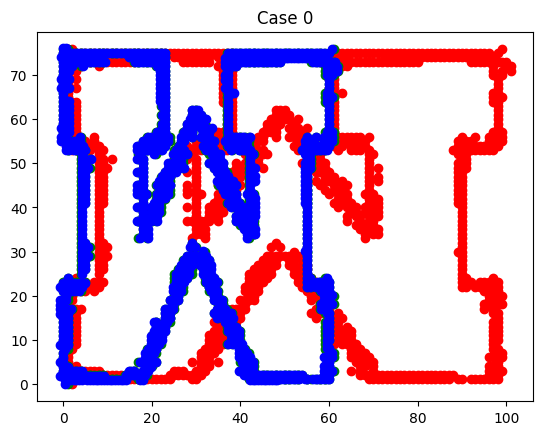

[[ 3.68911272e-01  8.92258702e-04 -3.93043451e-01]
 [ 2.75059829e-05  5.96020476e-01 -2.41643576e-02]
 [ 2.17658960e-07  1.34347784e-05  5.94639553e-01]]


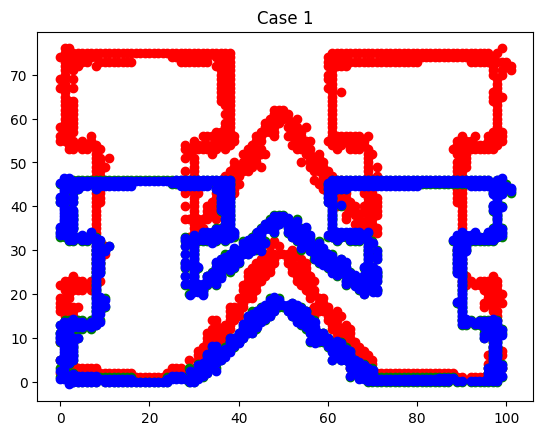

[[-2.53193239e-01 -3.99057800e-03  5.69038181e-01]
 [-5.45228988e-03 -2.53238879e-01  6.28011972e-01]
 [-1.21872179e-04 -1.08513265e-04 -3.91808736e-01]]


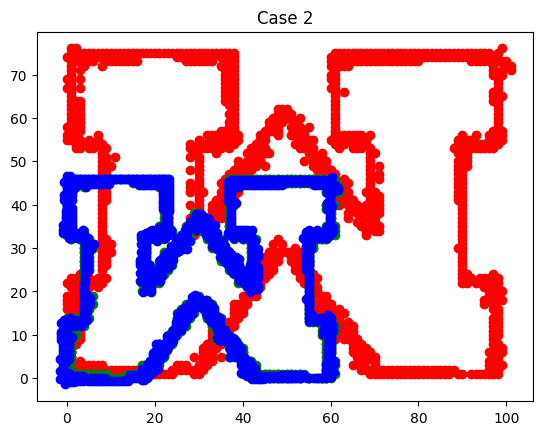

[[ 3.09846350e-12  5.77350269e-01 -2.27213490e-10]
 [ 5.77350269e-01  9.18668681e-13 -7.49060732e-11]
 [ 3.81114701e-14  2.27553847e-14  5.77350269e-01]]


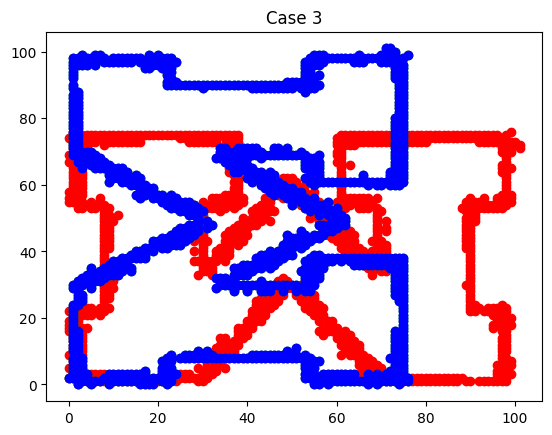

[[-7.91063985e-03  2.28491079e-13  6.01208628e-01]
 [-5.35800683e-14 -7.91063985e-03  7.98974625e-01]
 [ 2.89392053e-15 -1.06881468e-15  7.91063985e-03]]


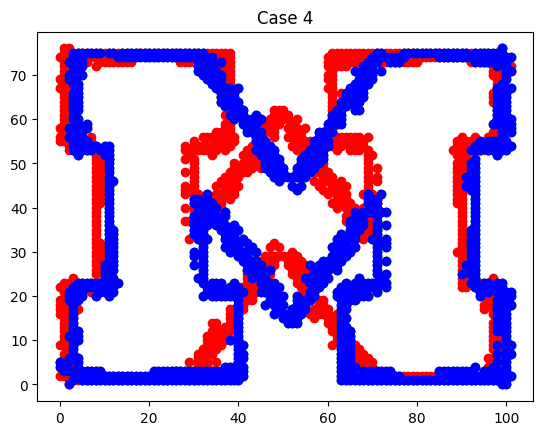

[[-1.38048111e-01 -2.19005570e-01  6.17163607e-01]
 [-2.20297434e-01 -1.36451811e-01  6.05518007e-01]
 [-7.60197606e-05 -4.81267787e-05 -3.43927668e-01]]


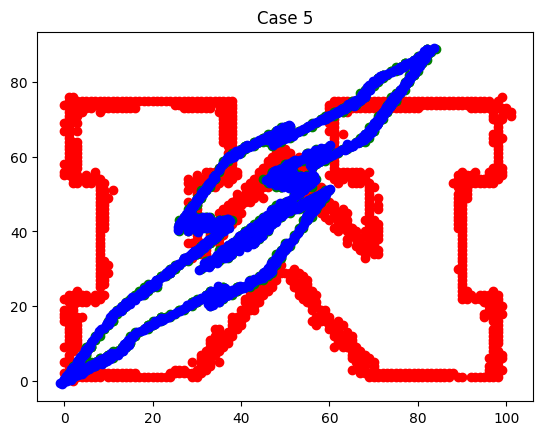

[[ 1.34941272e-01  7.96016480e-03 -1.11241055e-02]
 [-1.37954817e-02  1.51370758e-01  9.63220032e-01]
 [-5.34941898e-05 -1.11646326e-05  1.75235524e-01]]


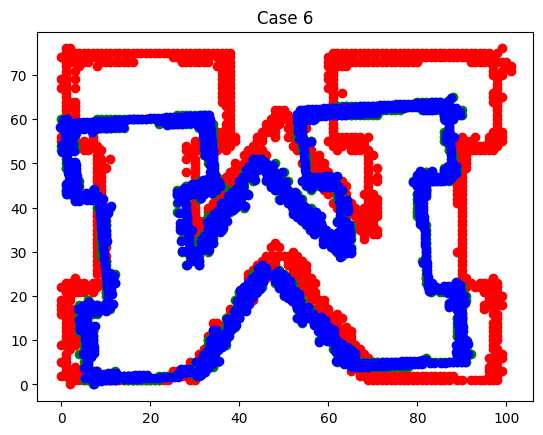

[[-1.44485744e-01  8.35368093e-03 -7.39389853e-01]
 [ 8.19996491e-03 -1.69535496e-01 -6.11590373e-01]
 [ 7.82502801e-05 -1.85804532e-05 -1.71768495e-01]]


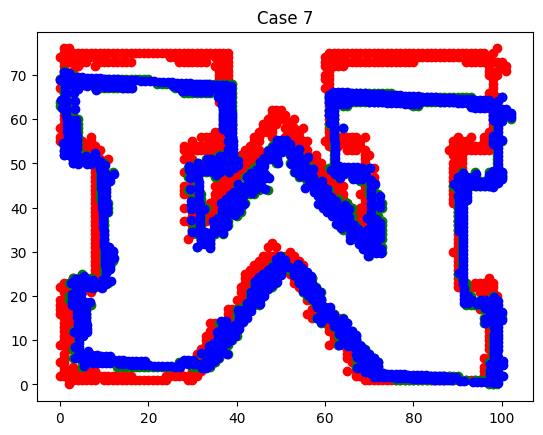

In [94]:
case = 8# you will encounter 8 different transformations
for i in range(case):
    XY = np.load('p1/points_case_'+str(i)+'.npy')
    # 1. generate your Homography matrix H using X and Y
    #
    #    specifically: fill function fit_homography() 
    #    such that H = fit_homography(XY)
    H = fit_homography(XY)
    # 2. Report H in your report
    print(H)
    # 3. Transform the points using H
    #
    #    specifically: fill function homography_transform
    #    such that Y_H = homography_transform(X, H)
    Y_H = homography_transform(XY[:,:2], H)
    # 4. Visualize points as three images in one figure
    # the following codes plot figure for you
    plt.scatter(XY[:,1],XY[:,0],c="red") #X
    plt.scatter(XY[:,3],XY[:,2],c="green") #Y
    plt.scatter(Y_H[:,1],Y_H[:,0],c="blue") #Y_hat
    plt.title(f'Case {i}')
    plt.show()

Discuss the transformations your observed in visualization with the homography matrix H.
Do they make sense to you?


The transformations are accurate. The blue scatter plot represents the results of the homography transformation, and as shown, is covering the green scatter plot which is the target.

**Image Stitching [55 pts]** \
Image stitching or photo stitching combines multiple photographic images that have overlapping fields of
view to produce a segmented panorama or high-resolution image. You’ll be able to do this by the end of this
problem (which is derived from an assignment developed by Svetlana Lazebnik at UIUC). 

Load both images: p2/uttower_left.jpg and p2/uttower_right.jpg. Convert
them to double and to grayscale. Display the grayscale images.


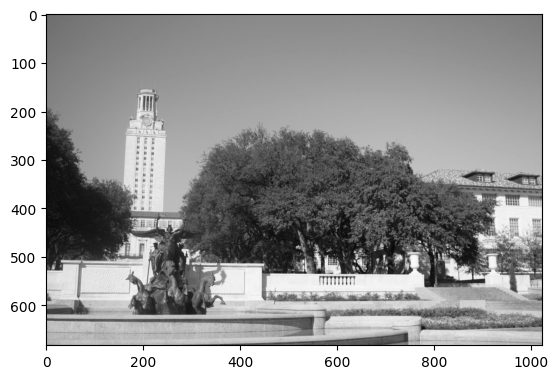

In [4]:
ut_L = read_img("p2/uttower_left.jpg")
plt.imshow(ut_L, cmap='gray')

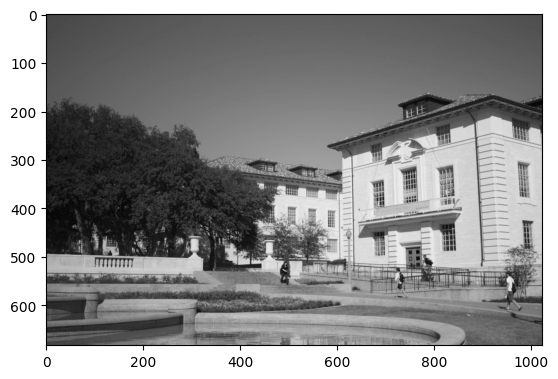

In [5]:
ut_R = read_img("p2/uttower_right.jpg")
plt.imshow(ut_R, cmap='gray')

 Use SIFT/SURF descriptors in OpenCV to detect feature points in both images. Display both
the images along with the feature points

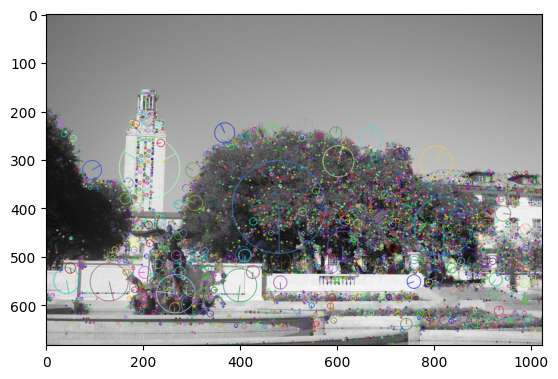

In [12]:
sift = cv2.xfeatures2d.SIFT_create()

ut_L = cv2.imread("p2/uttower_left.jpg")
gray_L = cv2.cvtColor(ut_L,cv2.COLOR_BGR2GRAY)
kp_L, ds_L= sift.detectAndCompute(gray_L, None)

ut_R = cv2.imread("p2/uttower_right.jpg")
gray_R = cv2.cvtColor(ut_R,cv2.COLOR_BGR2GRAY)
kp_R, ds_R = sift.detectAndCompute(gray_R, None)

left_draw = cv2.drawKeypoints(gray_L, kp_L, ut_L, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
right_draw= cv2.drawKeypoints(gray_R, kp_R, ut_R, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(left_draw, cmap='gray')

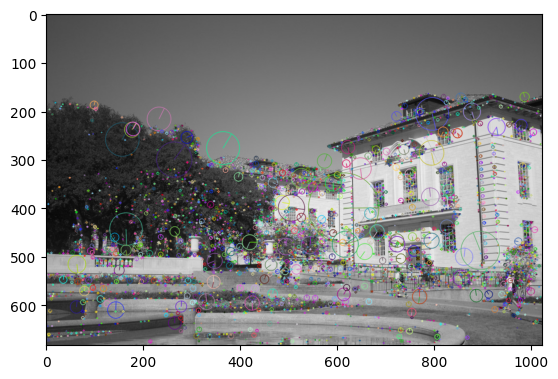

In [13]:
plt.imshow(right_draw, cmap='gray')

Compute distances between every descriptor in one image and every descriptor in the other
image. Alternatively, experiment with computing normalized correlation, or Euclidean distance after
normalizing all descriptors to have zero mean and unit standard deviation. Report your choices.
Note: You are not allowed to use built-in functions to match features for you, including but not
limit to cv2.BFMatcher. However, you can use them to debug your code and compare to your
implementation.

Select putative matches based on the matrix of pairwise descriptor distances obtained above.
You can (i) select all pairs whose descriptor distances are below a specified threshold; (ii) select the
top few hundred descriptor pairs with the smallest pairwise distances; or (iii) as described in lecture,
compute the ratio test described in lecture (nearest-neighbor to second-nearest-neighbor ratio test).
Report your choices

Run RANSAC to estimate a homography mapping one image onto the other. For the best
fit, Report the number of inliers and the average residual for the inliers (squared distance between
the point coordinates in one image and the transformed coordinates of the matching point in the other
image). Also, display the locations of inlier matches in both images. (i.e. for the inliers matches,
show lines between matching locations in the two images). You can use cv2.drawMatches to
draw matches.
Note: You need to implement RANSAC and calculate the transform matrix. You are not allowed
to use functions that do RANSAC in one line, including but not limit to cv2.findHomography
or cv2.getPerspectiveTransform. However, it’s a good idea to use them to debug your
implementation.

Warp one image onto the other using the estimated transformation. To do this, you will need
to learn about cv2.warpPerspective. Please read the documentation.
